In [152]:
import pandas as pd
import numpy as np
from skimage import io
from PIL import Image
from os import listdir
from os.path import isfile, join
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import keras
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input,Activation,Add

In [62]:
mypath = './Data/CroppedImages/'
filenames = np.array([f for f in listdir(mypath) if isfile(join(mypath, f))])
splitcolumns = [x.split('_')[0:3] + [mypath + x] for x in filenames if x.count('_') == 3]
filecolumns = ['age','gender','race','file']
filedf = pd.DataFrame(data = splitcolumns, columns = filecolumns)

In [63]:
filedf.head()

,age,gender,race,file
0,100,0,0,./Data/CroppedImages/100_0_0_20170112213500903...
1,100,0,0,./Data/CroppedImages/100_0_0_20170112215240346...
2,100,1,0,./Data/CroppedImages/100_1_0_20170110183726390...
3,100,1,0,./Data/CroppedImages/100_1_0_20170112213001988...
4,100,1,0,./Data/CroppedImages/100_1_0_20170112213303693...


In [64]:
filedf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     23705 non-null  object
 1   gender  23705 non-null  object
 2   race    23705 non-null  object
 3   file    23705 non-null  object
dtypes: object(4)
memory usage: 740.9+ KB


In [65]:
filedf.describe()

,age,gender,race,file
count,23705,23705,23705,23705
unique,104,2,5,23705
top,26,0,0,./Data/CroppedImages/100_0_0_20170112213500903...
freq,2197,12391,10078,1


In [66]:
filedf['agebracket'] = filedf['age'].astype(int).floordiv(20)

In [73]:
filedf['agebracket'].unique()

array([5, 0, 1, 2, 3, 4])

In [74]:
images = []
labels = []

In [75]:
%%time
for index, row in filedf.iterrows():
    img = np.array(Image.open(row[3]))
    flat_img = img
    images.append(img)
    labels.append([row[1],row[2],row[4]])

CPU times: total: 10.4 s
Wall time: 14.4 s


In [76]:
filedf.head()

,age,gender,race,file,agebracket
0,100,0,0,./Data/CroppedImages/100_0_0_20170112213500903...,5
1,100,0,0,./Data/CroppedImages/100_0_0_20170112215240346...,5
2,100,1,0,./Data/CroppedImages/100_1_0_20170110183726390...,5
3,100,1,0,./Data/CroppedImages/100_1_0_20170112213001988...,5
4,100,1,0,./Data/CroppedImages/100_1_0_20170112213303693...,5


In [77]:
npimages = np.array(images)
nplabels = np.array(labels).astype(int)

In [79]:
X = npimages
y = nplabels
ygender = nplabels[:,0]

In [80]:
yage = nplabels[:,2]

In [103]:
yrace = nplabels[:,1]

In [82]:
input_images = keras.Input(shape=(200, 200, 3), dtype='float32', name='images')

In [83]:
X_gendertrain, X_gendertest, y_gendertrain, y_gendertest = train_test_split(X,ygender,test_size=0.33, random_state=42)

In [87]:
modelgender = models.Sequential()
modelgender.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
modelgender.add(layers.MaxPooling2D((2, 2)))
modelgender.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelgender.add(layers.MaxPooling2D((2, 2)))
modelgender.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelgender.add(layers.MaxPooling2D((2, 2)))
modelgender.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelgender.add(layers.MaxPooling2D((2, 2)))
modelgender.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelgender.add(layers.Flatten())
modelgender.add(layers.Dense(64, activation='relu'))
modelgender.add(layers.Dense(2))
modelgender.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 64)      

In [91]:
modelgender.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [93]:
historygender = modelgender.fit(X_gendertrain, y_gendertrain, epochs=5, 
                    validation_data=(X_gendertest, y_gendertest),
                                )

Epoch 1/5
497/497 [==============================] - 649s 1s/step - loss: 0.4448 - accuracy: 0.7923 - val_loss: 0.3665 - val_accuracy: 0.8354
Epoch 2/5
497/497 [==============================] - 574s 1s/step - loss: 0.3405 - accuracy: 0.8518 - val_loss: 0.3370 - val_accuracy: 0.8453
Epoch 3/5
497/497 [==============================] - 604s 1s/step - loss: 0.3155 - accuracy: 0.8598 - val_loss: 0.3434 - val_accuracy: 0.8417
Epoch 4/5
497/497 [==============================] - 597s 1s/step - loss: 0.2881 - accuracy: 0.8760 - val_loss: 0.3131 - val_accuracy: 0.8594
Epoch 5/5
497/497 [==============================] - 579s 1s/step - loss: 0.2714 - accuracy: 0.8819 - val_loss: 0.3077 - val_accuracy: 0.8605


In [94]:
y_genderpred = modelgender.predict(X_gendertest)
y_genderclasses = y_genderpred.argmax(axis=-1)
confusion_matrix(y_genderclasses, y_gendertest)

array([[3434,  441],
       [ 650, 3298]], dtype=int64)

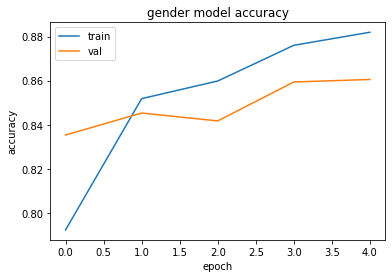

In [95]:
plt.plot(historygender.history['accuracy'])
plt.plot(historygender.history['val_accuracy'])
plt.title('gender model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [96]:
X_racetrain, X_racetest, y_racetrain, y_racetest = train_test_split(X,yrace,test_size=0.33, random_state=42)

In [134]:
modelrace = models.Sequential()
modelrace.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
modelrace.add(layers.MaxPooling2D((2, 2)))
modelrace.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelrace.add(layers.MaxPooling2D((2, 2)))
modelrace.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelrace.add(layers.MaxPooling2D((2, 2)))
modelrace.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelrace.add(layers.MaxPooling2D((2, 2)))
modelrace.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelrace.add(layers.Flatten())
modelrace.add(layers.Dense(64, activation='relu'))
modelrace.add(layers.Dense(5))
modelrace.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_81 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_82 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 23, 23, 64)     

In [135]:
modelrace.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
historyrace = modelrace.fit(X_racetrain, y_racetrain, epochs=5, 
                    validation_data=(X_racetest, y_racetest))

Epoch 1/5
497/497 [==============================] - 519s 1s/step - loss: 1.2075 - accuracy: 0.6006 - val_loss: 1.0003 - val_accuracy: 0.6670
Epoch 2/5
497/497 [==============================] - 490s 985ms/step - loss: 0.8372 - accuracy: 0.7063 - val_loss: 0.8660 - val_accuracy: 0.6969
Epoch 3/5
497/497 [==============================] - 483s 973ms/step - loss: 0.7599 - accuracy: 0.7358 - val_loss: 0.7768 - val_accuracy: 0.7261
Epoch 4/5
497/497 [==============================] - 468s 942ms/step - loss: 0.7054 - accuracy: 0.7558 - val_loss: 0.7546 - val_accuracy: 0.7351
Epoch 5/5
497/497 [==============================] - 467s 939ms/step - loss: 0.6770 - accuracy: 0.7625 - val_loss: 0.7624 - val_accuracy: 0.7321


In [137]:
y_racepred = modelrace.predict(X_racetest)
y_raceclasses = y_racepred.argmax(axis=-1)
confusion_matrix(y_raceclasses, y_racetest)

array([[2620,  100,   83,  205,  235],
       [  73, 1211,   35,  158,   49],
       [ 321,   96,  978,  103,  115],
       [ 195,   82,   21,  836,  110],
       [  62,   15,    8,   30,   82]], dtype=int64)

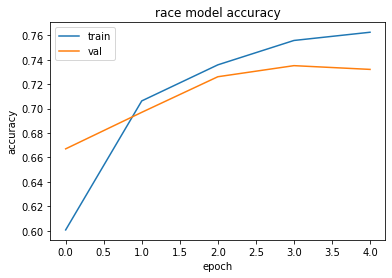

In [138]:
plt.plot(historyrace.history['accuracy'])
plt.plot(historyrace.history['val_accuracy'])
plt.title('race model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [139]:
X_agetrain, X_agetest, y_agetrain, y_agetest = train_test_split(X,yage,test_size=0.33, random_state=42)

In [140]:
modelage = models.Sequential()
modelage.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
modelage.add(layers.MaxPooling2D((2, 2)))
modelage.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelage.add(layers.MaxPooling2D((2, 2)))
modelage.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelage.add(layers.MaxPooling2D((2, 2)))
modelage.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelage.add(layers.MaxPooling2D((2, 2)))
modelage.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelage.add(layers.Flatten())
modelage.add(layers.Dense(64, activation='relu'))
modelage.add(layers.Dense(6))
modelage.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 23, 23, 64)     

In [141]:
modelage.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [142]:
historyage = modelage.fit(X_agetrain, y_agetrain, epochs=5, 
                    validation_data=(X_agetest, y_agetest))

Epoch 1/5
497/497 [==============================] - 462s 929ms/step - loss: 1.1267 - accuracy: 0.5955 - val_loss: 0.8938 - val_accuracy: 0.6532
Epoch 2/5
497/497 [==============================] - 446s 897ms/step - loss: 0.8780 - accuracy: 0.6577 - val_loss: 0.7954 - val_accuracy: 0.6896
Epoch 3/5
497/497 [==============================] - 470s 947ms/step - loss: 0.7898 - accuracy: 0.6898 - val_loss: 0.7846 - val_accuracy: 0.6914
Epoch 4/5
497/497 [==============================] - 477s 960ms/step - loss: 0.7477 - accuracy: 0.6999 - val_loss: 0.7579 - val_accuracy: 0.6960
Epoch 5/5
497/497 [==============================] - 443s 891ms/step - loss: 0.7137 - accuracy: 0.7136 - val_loss: 0.7027 - val_accuracy: 0.7230


In [144]:
y_agepred = modelage.predict(X_agetest)
y_ageclasses = y_agepred.argmax(axis=-1)
confusion_matrix(y_ageclasses, y_agetest)

array([[1127,   55,   15,    6,    0,    0],
       [ 360, 3563,  682,  116,    9,    0],
       [  15,  253,  563,  161,   17,    0],
       [  15,   67,  217,  383,  158,    9],
       [   4,    0,    1,    6,   20,    1],
       [   0,    0,    0,    0,    0,    0]], dtype=int64)

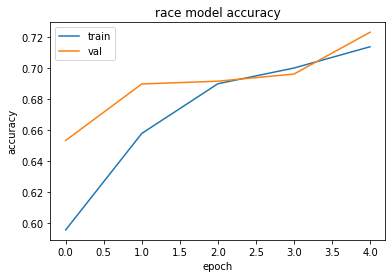

In [145]:
plt.plot(historyage.history['accuracy'])
plt.plot(historyage.history['val_accuracy'])
plt.title('race model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [248]:
ymodel = np.array([[[x[0]],[x[1]],[x[2]]] for x in y])
ymodel.shape

(23705, 3, 1)

In [254]:
y_train2=[y_train[:,0],y_train[:,1],y_train[:,2]]
y_test2=[y_test[:,0],y_test[:,1],y_test[:,2]]

In [257]:
print(np.unique(y_train2[0]))
print(np.unique(y_train2[1]))
print(np.unique(y_train2[2]))

[0 1]
[0 1 2 3 4]
[0 1 2 3 4 5]


In [265]:


def SimpleConvolution(input_tensor,filters):

    x = layers.Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same')(input_tensor)

    x= Activation('relu')(x)

    return x

def Simplemodel(input_shape):

  inputs = Input((input_shape))

  conv_1= Convolution(inputs,32)

  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)

  conv_2 = Convolution(maxp_1,64)

  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)

  conv_3 = Convolution(maxp_2,64)

  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)

  conv_4 = Convolution(maxp_3,64)

  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)

  conv_5 = Convolution(maxp_4,64)

  flatten= Flatten() (conv_5)

  dense_1= Dense(64,activation='relu')(flatten)

  dense_2= Dense(64,activation='relu')(flatten)

  dense_3= Dense(64,activation='relu')(flatten)

  output_1= Dense(1,activation="sigmoid",name='sex_out')(dense_1)

  output_2= Dense(5,activation="sigmoid",name='race_out')(dense_2)
    
  output_3= Dense(6,activation="sigmoid",name='age_out')(dense_3)

  model = Model(inputs=[inputs], outputs=[output_1,output_2,output_3])

  model.compile(loss=["binary_crossentropy","sparse_categorical_crossentropy", "sparse_categorical_crossentropy"], optimizer="Adam",

  metrics=["accuracy"])

  return model

In [266]:
Modelsimple=model((200,200,3))
Modelsimple.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_154 (Conv2D)            (None, 200, 200, 32  896         ['input_17[0][0]']               
                                )                                                                 
                                                                                                  
 dropout_103 (Dropout)          (None, 200, 200, 32  0           ['conv2d_154[0][0]']             
                                )                                                          

In [267]:
SimpleHistory=Modelsimple.fit(X_train,y_train_conv,validation_data=(X_test,y_test_conv),epochs=10)

Epoch 1/10
497/497 [==============================] - 927s 2s/step - loss: 4.6951 - sex_out_loss: 0.7956 - race_out_loss: 1.8392 - age_out_loss: 1.8076 - sex_out_accuracy: 0.7753 - race_out_accuracy: 0.5735 - age_out_accuracy: 0.5869 - val_loss: 2.6125 - val_sex_out_loss: 0.4147 - val_race_out_loss: 1.0210 - val_age_out_loss: 0.9625 - val_sex_out_accuracy: 0.8222 - val_race_out_accuracy: 0.6609 - val_age_out_accuracy: 0.6451
Epoch 2/10
497/497 [==============================] - 902s 2s/step - loss: 2.3334 - sex_out_loss: 0.3497 - race_out_loss: 0.9111 - age_out_loss: 0.8773 - sex_out_accuracy: 0.8432 - race_out_accuracy: 0.6779 - age_out_accuracy: 0.6564 - val_loss: 2.2343 - val_sex_out_loss: 0.3454 - val_race_out_loss: 0.8628 - val_age_out_loss: 0.8453 - val_sex_out_accuracy: 0.8429 - val_race_out_accuracy: 0.7037 - val_age_out_accuracy: 0.6840
Epoch 3/10
497/497 [==============================] - 893s 2s/step - loss: 2.1574 - sex_out_loss: 0.3296 - race_out_loss: 0.8393 - age_out_los

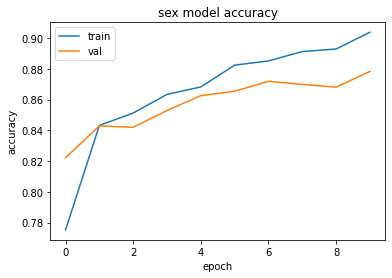

In [268]:
plt.plot(SimpleHistory.history['sex_out_accuracy'])
plt.plot(SimpleHistory.history['val_sex_out_accuracy'])
plt.title('sex model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

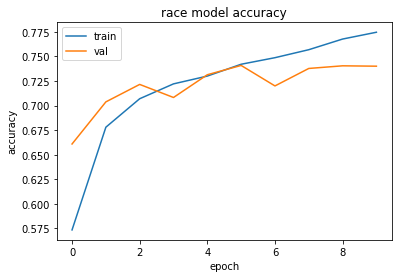

In [269]:
plt.plot(SimpleHistory.history['race_out_accuracy'])
plt.plot(SimpleHistory.history['val_race_out_accuracy'])
plt.title('race model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

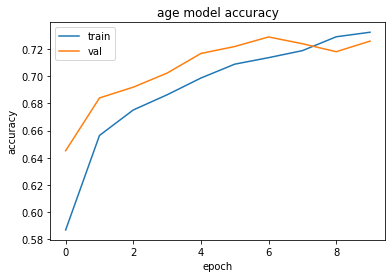

In [270]:
plt.plot(SimpleHistory.history['age_out_accuracy'])
plt.plot(SimpleHistory.history['val_age_out_accuracy'])
plt.title('age model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [271]:
ypred = Modelsimple.predict(X_test)

In [295]:
y_gender_classes = np.round(ypred[0])
y_race_classes = np.argmax(ypred[1],axis=-1)
y_age_classes = np.argmax(ypred[2],axis=-1)

In [296]:
print('gender confusion matrix')
print(confusion_matrix(y_test_conv[0],y_gender_classes))

gender confusion matrix
[[3459  625]
 [ 327 3412]]


In [292]:
print('race confusion matrix')
print(confusion_matrix(y_test_conv[1],y_race_classes))

race confusion matrix
[[2922  105   47  170   27]
 [ 154 1231   12   99    8]
 [ 271   52  725   41   36]
 [ 326  123    9  864   10]
 [ 344   57   17  126   47]]


In [293]:
print('age confusion matrix')
print(confusion_matrix(y_test_conv[2],y_age_classes))

age confusion matrix
[[1176  317   16    8    4    0]
 [  83 3596  242   14    3    0]
 [  20  714  660   81    3    0]
 [  17  125  300  199   31    0]
 [   9   15   49   84   47    0]
 [   1    0    1    4    4    0]]
